In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
data15 = pd.read_csv('C:/Users/User/Desktop/data visualization/2015.csv')
data15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<Figure size 2000x2000 with 0 Axes>

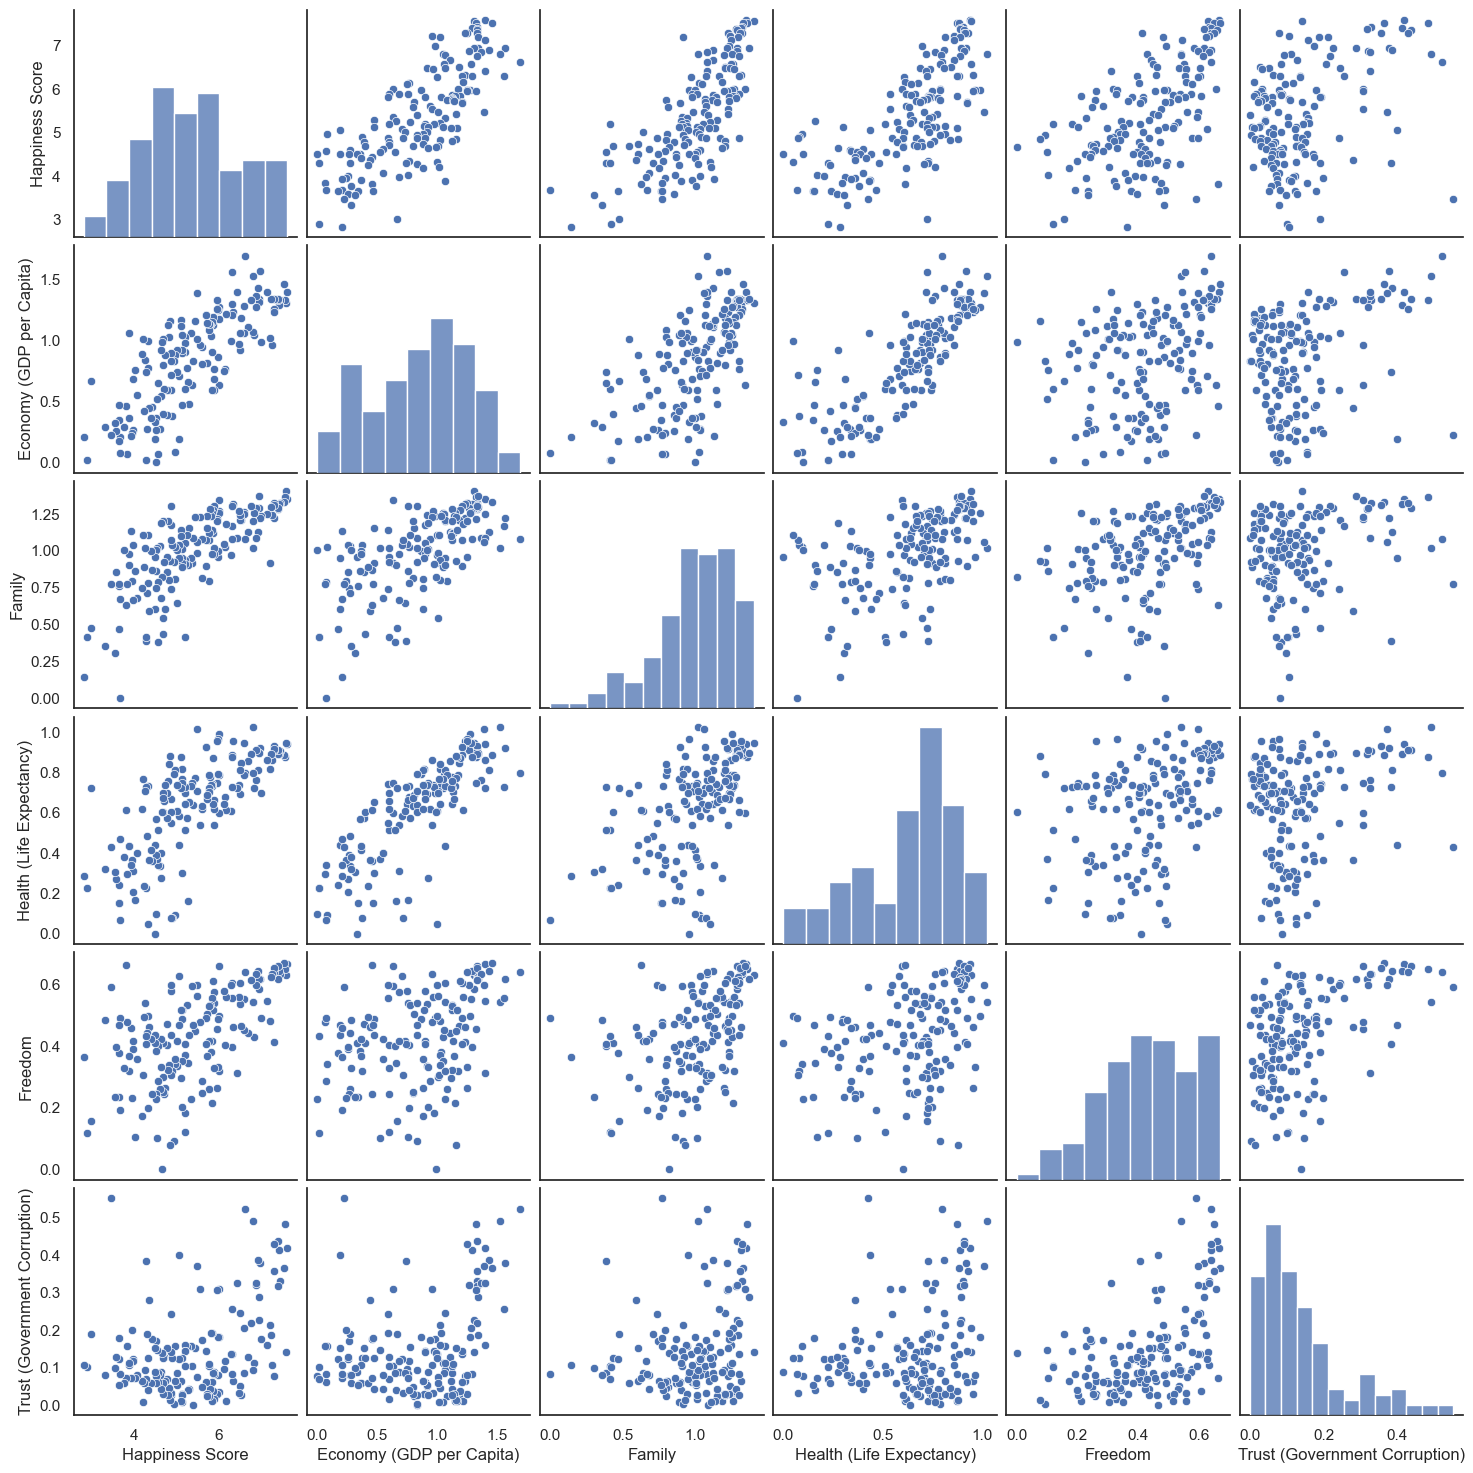

In [18]:
fig = plt.figure(figsize=(20,20))
sns.set(style="white",font_scale=1);
sns.pairplot(data15[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', \
    'Freedom', 'Trust (Government Corruption)']]);

    # In this dataset we have some features, which depends on Happiness Score (it follows from their description)

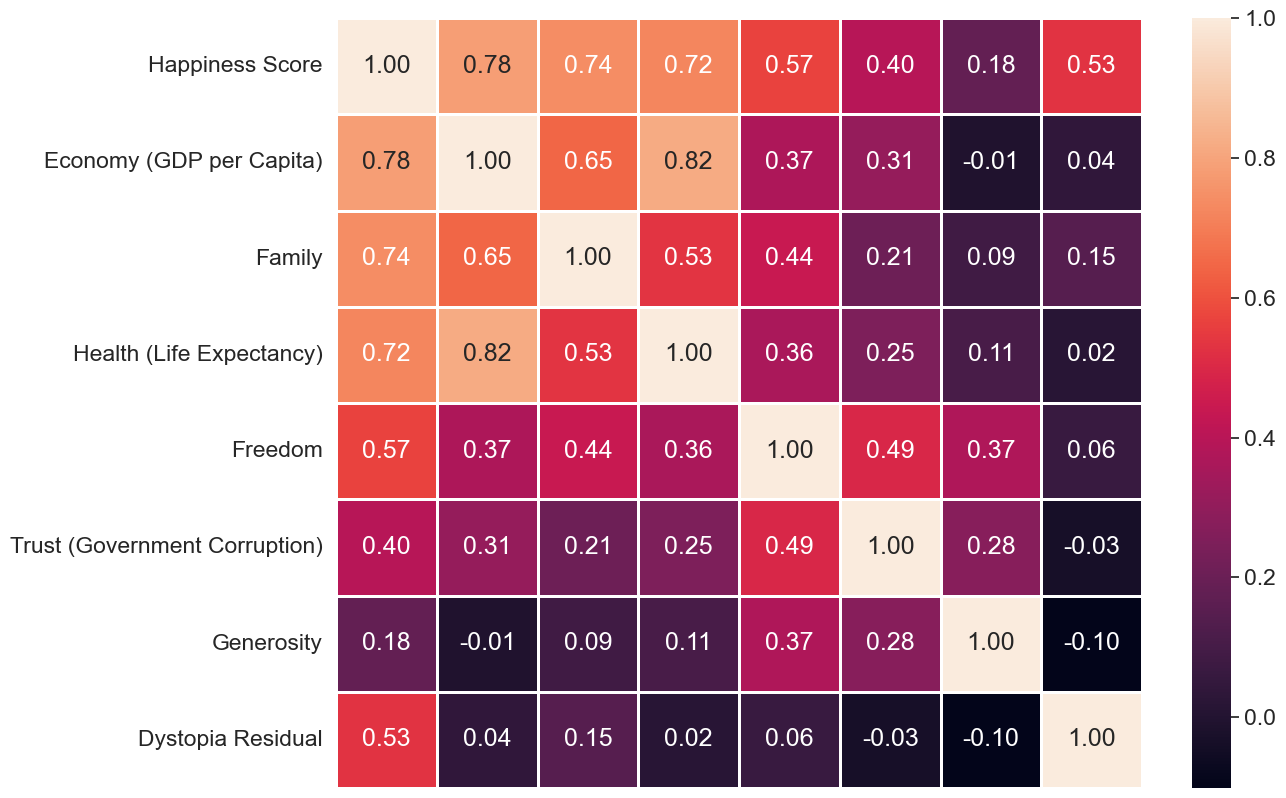

In [19]:
#We can observe visual high correlation. Economy/Happiness graphics seems like ready model for linear regression.
fig = plt.figure(figsize=(13,10))
sns.set(style="white",font_scale=1.5)
sns.heatmap(data15.dropna()[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', \
    'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']].corr(), fmt='.2f',annot=True,\
             xticklabels=False,linewidth=2);

In [20]:
pip install nbformat 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#Change rating from Economy to Family:
vis15 = data15[['Happiness Score','Economy (GDP per Capita)','Family','Country']]

fig = go.Figure()

for x in range(40):
    fig.add_trace(go.Scatter(
        x=[vis15.iloc[x,:]['Happiness Score'], vis15.iloc[x,:]['Happiness Score']],
        y=[vis15.iloc[x,:]['Economy (GDP per Capita)'],vis15.iloc[x,:]['Family']],
        mode="markers+lines+text",
        text = [vis15.iloc[x,:]['Country']],
        textposition="bottom center"
    ))

    fig.update_layout(  
        showlegend=False,
    )
fig.show()

In [22]:
#Happiness Score:
fig = px.scatter(data15, x='Happiness Score', y='Economy (GDP per Capita)', text='Country')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=1000,
)
fig.show()

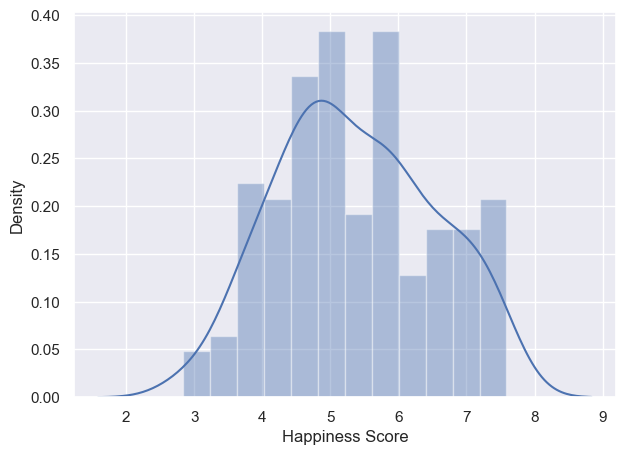

In [23]:
#The most correlated features with Happiness Score are Economy, Family, Health and Freedom. It's logical, because these basic principles provide high level of happy. What about histogramm of happyness? From it's histogramm we can see something like bimodal distribution. Distribution tails arent equal - highly contented people more than unhappy.
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(data15['Happiness Score'],bins=12);

In [28]:
!pip install basemap
!pip install basemap-data



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from mpl_toolkits.basemap import Basemap

In [32]:
concap = pd.read_csv('C:/Users/User/Desktop/data visualization/country-capitals.csv', on_bad_lines='skip')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [33]:
#Geographic map: Countries and Capitals

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data15,left_on='CountryName',right_on='Country')

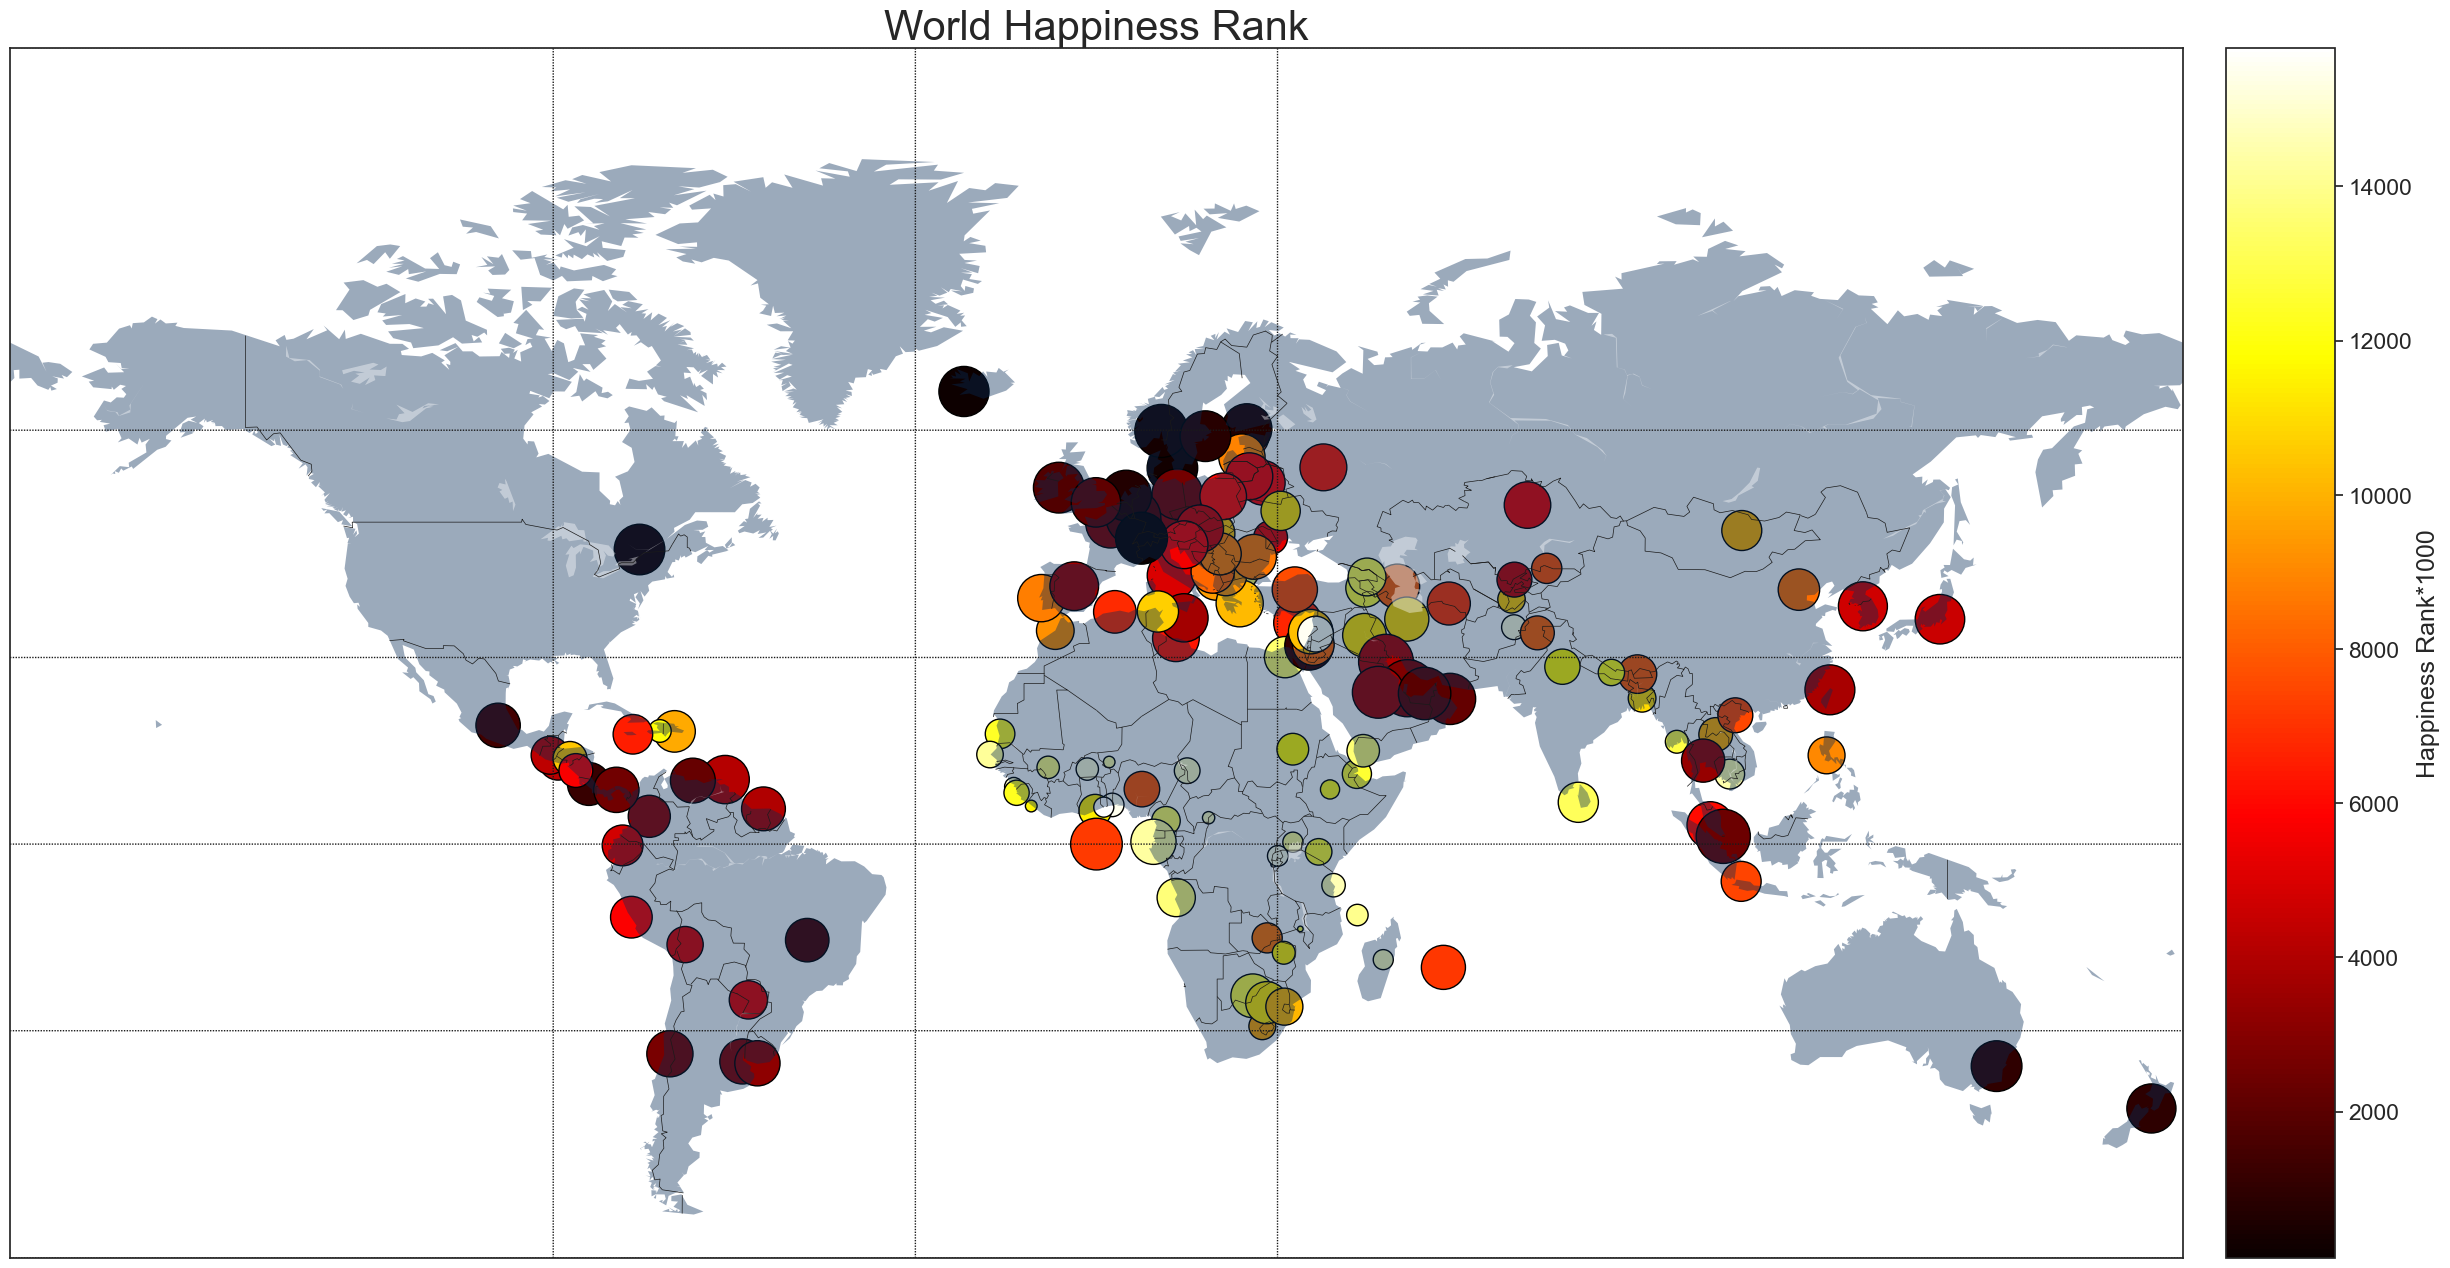

In [34]:
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full['Happiness Rank'].values
    a_2 = data_full['Economy (GDP per Capita)'].values
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=1000*a_2,linewidth=1,edgecolors='black',cmap='hot', alpha=1)
    
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Happiness Rank*1000')
    #plt.clim(20000, 100000)
    plt.title("World Happiness Rank", fontsize=30)
    plt.show()
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))
mapWorld()

In [35]:
#World Happiness Rank

data_full['Economy (GDP per Capita) color'] = data_full['Economy (GDP per Capita)'].apply(lambda x: int(100*x))
data_full['Happiness Rank size'] = data_full['Happiness Rank'].apply(lambda x: int(x//5))
fig = go.Figure()

fig.add_trace(go.Scattergeo(
                         lat = data_full['CapitalLatitude'],
                     lon = data_full['CapitalLongitude'],
                     text = data_full['CountryName'],
#                     mode="markers+text",|
                     marker={
                        "color": data_full['Economy (GDP per Capita) color'],
                        "line": {"width": 1},
                 "size": data_full['Happiness Rank size']}
                           ))

fig.update_layout(
    title_text="World Happiness Rank"
)

fig.show()

In [36]:
contr_list = list(data15[data15['Region'].isin(['Western Europe','Central and Eastern Europe'])]['Country'].unique())
eu_gps = concap[concap['CountryName'].isin(contr_list)]
eu_data = data15[data15['Region'].isin(['Western Europe','Central and Eastern Europe'])]
eu_full = pd.merge(eu_gps[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         eu_data,left_on='CountryName',right_on='Country')

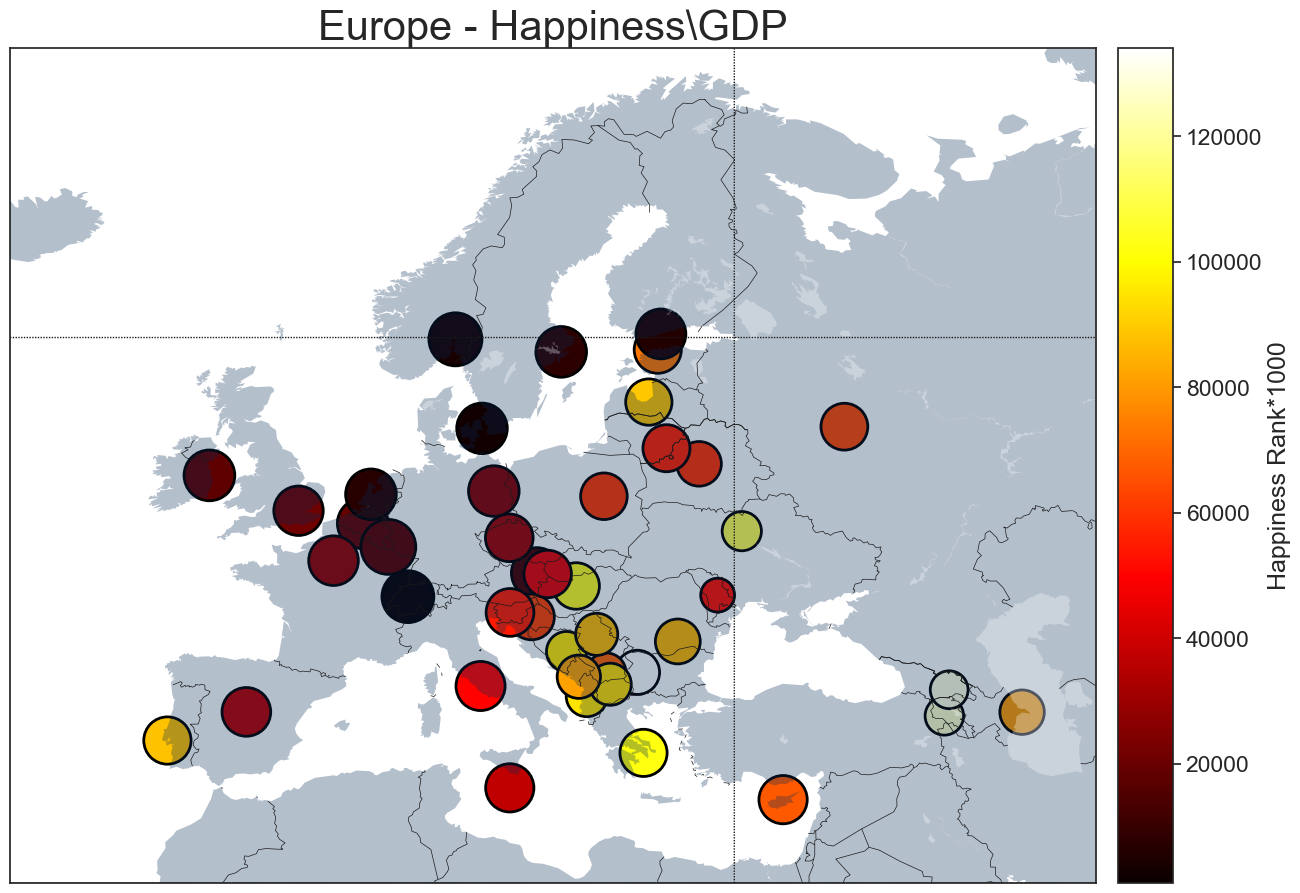

In [37]:
def mapEurope(column_color, column_size,colbar=True):
    m = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=72,\
                llcrnrlon=-20,urcrnrlon=55,resolution='l')
    m.drawcountries()
    m.drawstates()
    #m.drawmapboundary()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = eu_full['CapitalLatitude'].values
    lon = eu_full['CapitalLongitude'].values
    a_1 = eu_full[column_color].values
    a_2 = eu_full[column_size].values
    #s=1000*a_2
    m.scatter(lon, lat, latlon=True,c=1000*a_1,s=1000*a_2,linewidth=2,edgecolors='black',cmap='hot', alpha=1)
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.3)
    if colbar:
            m.colorbar(label='Happiness Rank*1000')
    else:pass
plt.figure(figsize=(15,15))
plt.title('Europe - Happiness\GDP', fontsize=30)
mapEurope('Happiness Rank','Economy (GDP per Capita)')

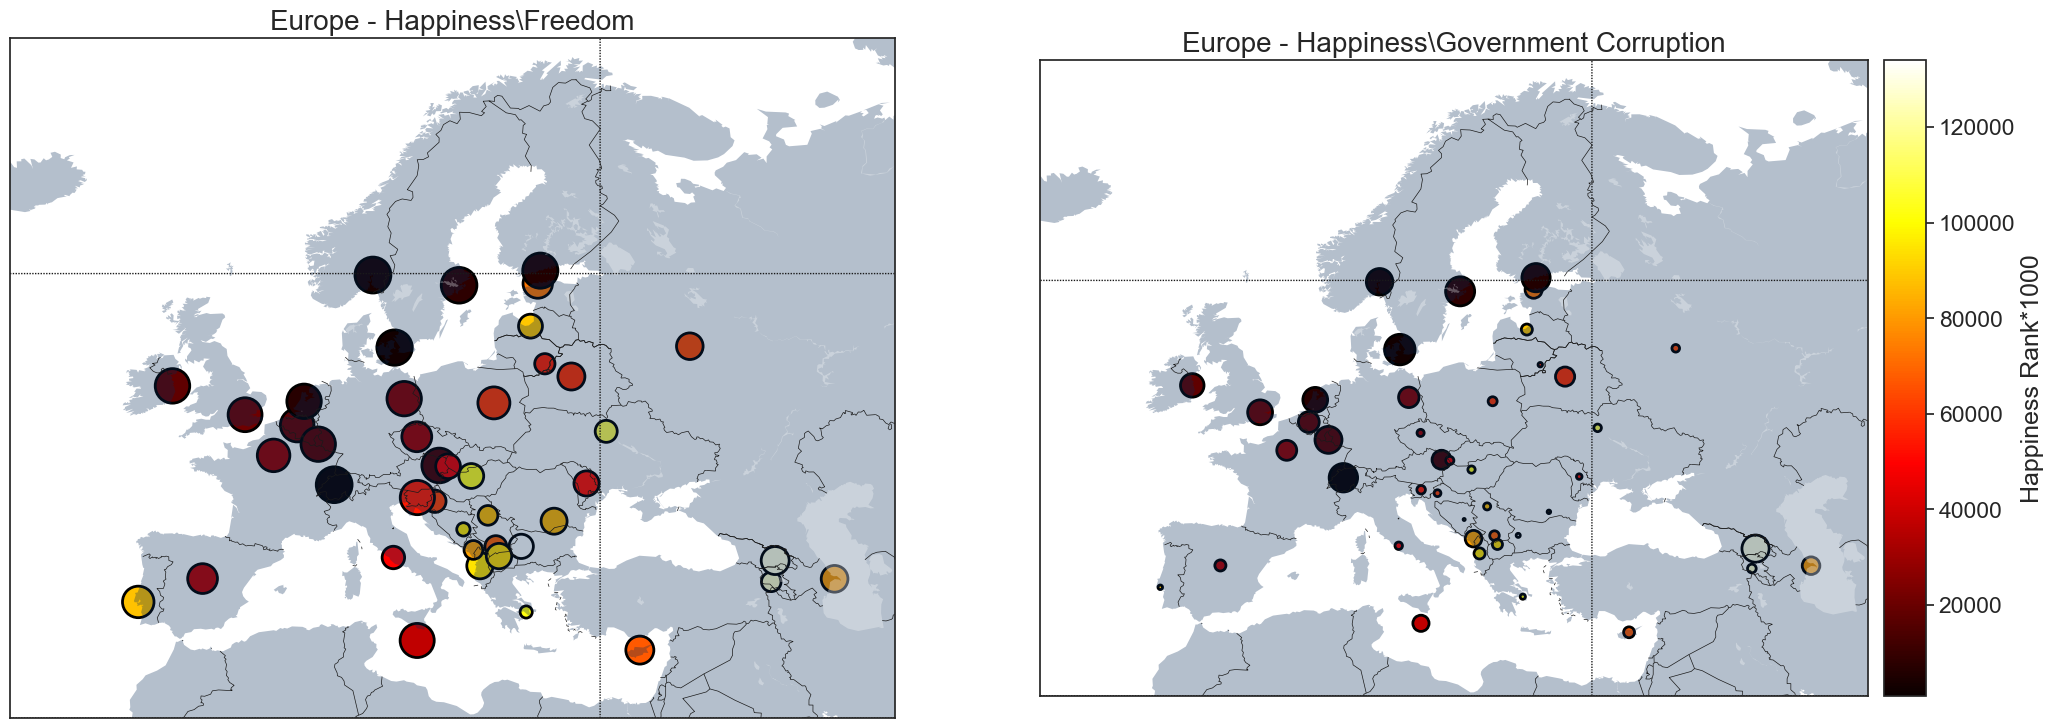

In [38]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Europe - Happiness\Freedom', fontsize=20)
mapEurope('Happiness Rank','Freedom',colbar=False)
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Europe - Happiness\Government Corruption', fontsize=20)
mapEurope('Happiness Rank','Trust (Government Corruption)')
plt.tight_layout()

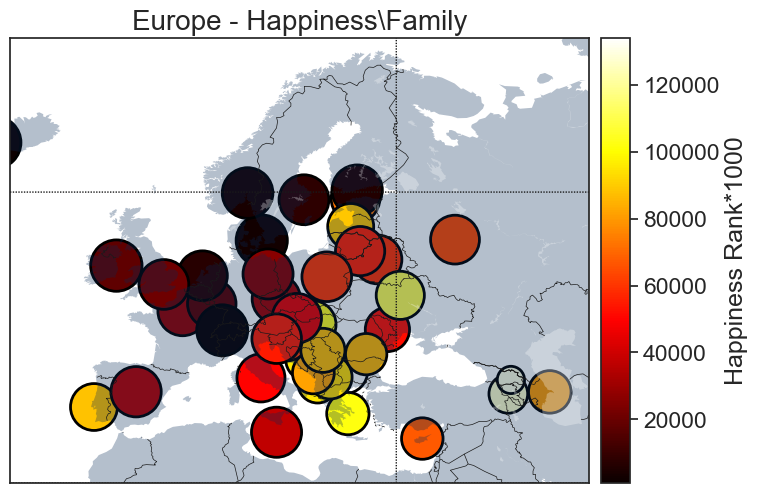

In [39]:
plt.figure(figsize=(8,8))
plt.title('Europe - Happiness\Family', fontsize=20)
mapEurope('Happiness Rank','Family')

In [41]:
df = pd.read_csv('C:/Users/User/Desktop/data visualization/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot: xlabel='Freedom to make life choices', ylabel='Country or region'>

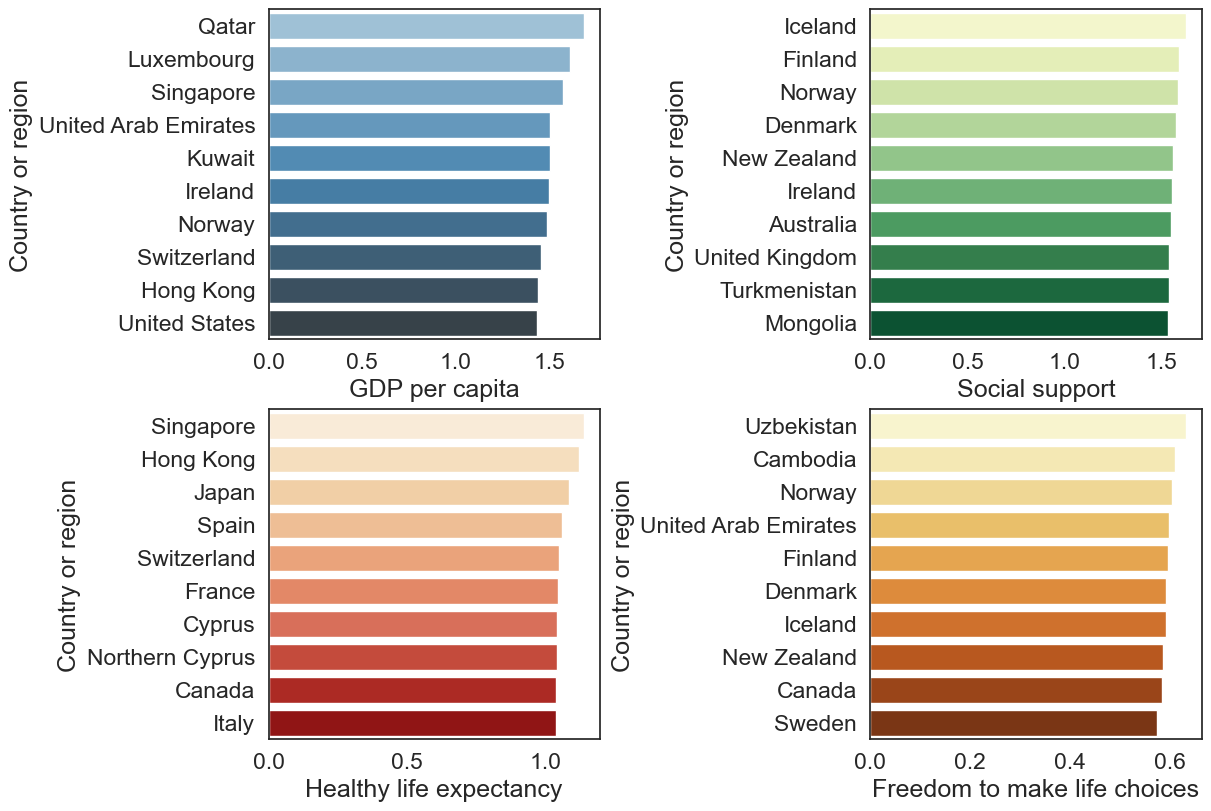

In [42]:
#Top 10 Countries for each attributes in 2019
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot: xlabel='Perceptions of corruption', ylabel='Country or region'>

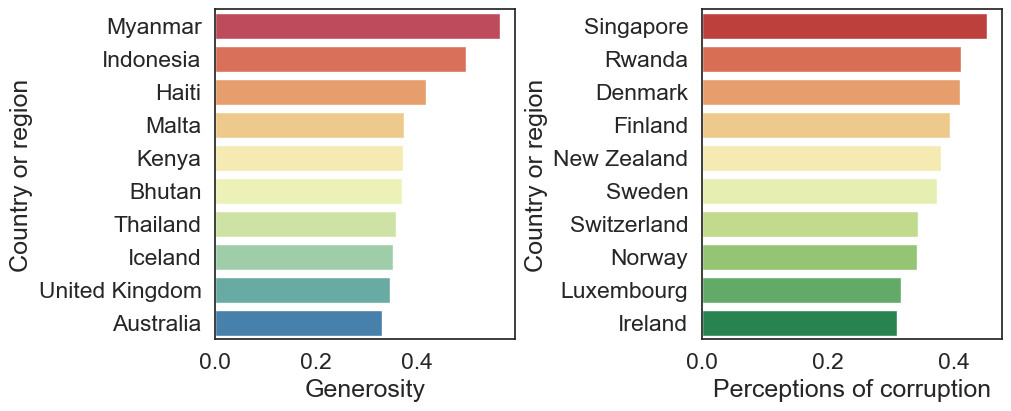

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

In [45]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)


In [47]:
df16 = pd.read_csv('C:/Users/User/Desktop/data visualization/2016.csv')
df17 = pd.read_csv('C:/Users/User/Desktop/data visualization/2017.csv')
df18 = pd.read_csv('C:/Users/User/Desktop/data visualization/2018.csv')

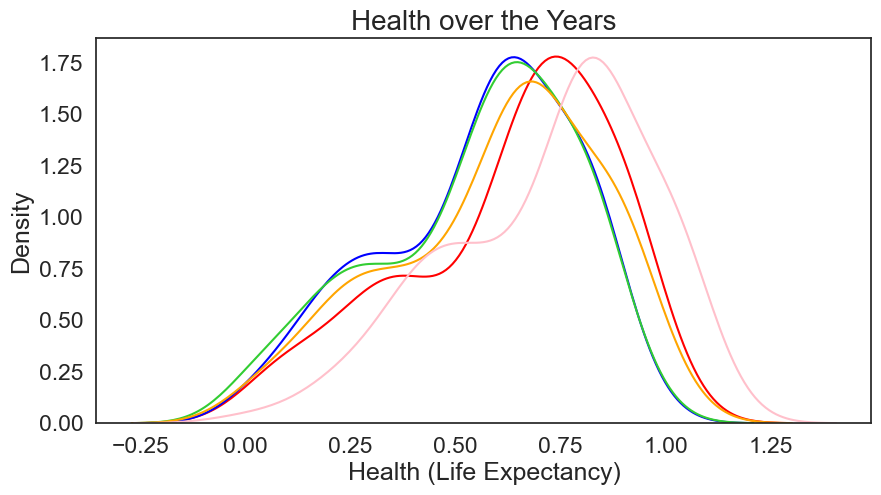

In [48]:
plt.figure(figsize=(10,5))
sns.kdeplot(data15['Health (Life Expectancy)'],color='red')
sns.kdeplot(df16['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df17['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(df18['Healthy life expectancy'],color='orange')
sns.kdeplot(df['Healthy life expectancy'],color='pink')
plt.title('Health over the Years',size=20)
plt.show()

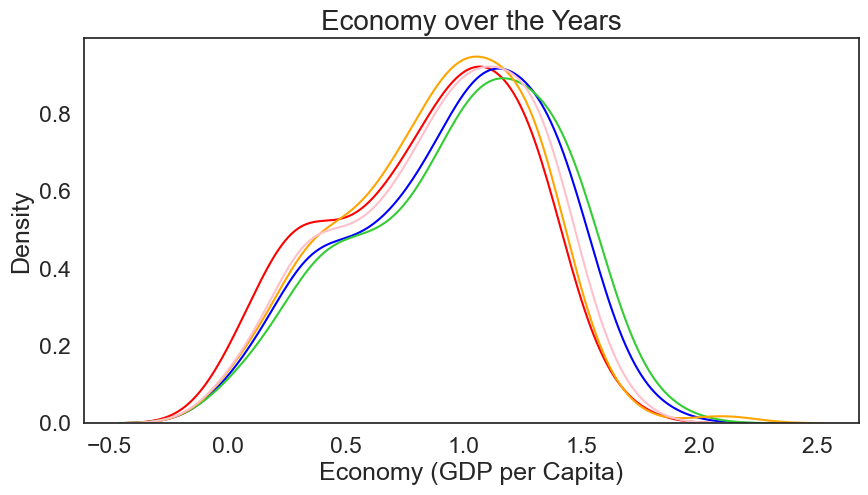

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(data15['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df16['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df17['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(df18['GDP per capita'],color='orange')
sns.kdeplot(df['GDP per capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

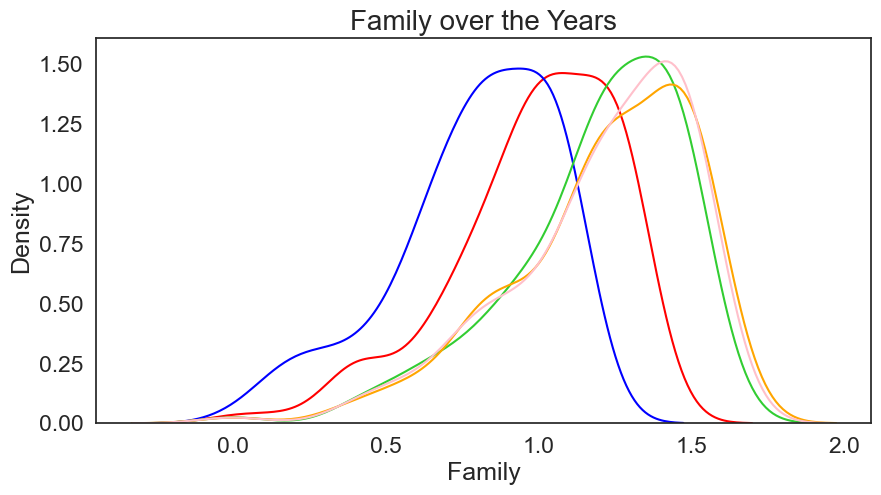

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(data15['Family'],color='red')
sns.kdeplot(df16['Family'],color='blue')
sns.kdeplot(df17['Family'],color='limegreen')
sns.kdeplot(df18['Social support'],color='orange')
sns.kdeplot(df['Social support'],color='pink')
plt.title('Family over the Years',size=20)
plt.show()

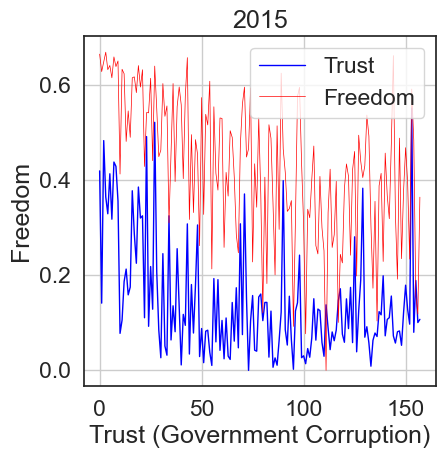

In [52]:
 # relationship between Freedom and Corruption prevalent in the government
 fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
data15["Trust (Government Corruption)"].plot(kind='line', color='blue',label='Trust',linewidth=1,grid=True,linestyle="-")
data15["Freedom"].plot(kind="line", color="red", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.title('2015')
plt.legend(loc='upper right')
plt.show()

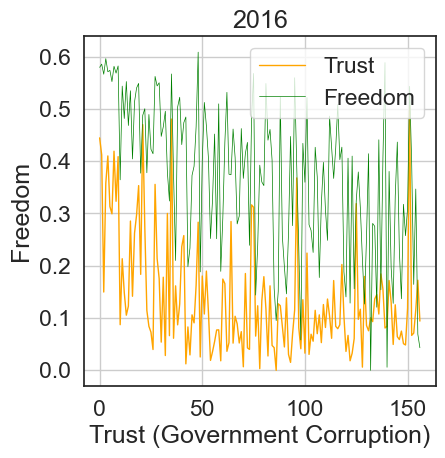

In [53]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 2)
df16["Trust (Government Corruption)"].plot(kind='line', color='orange',label='Trust',linewidth=1,grid=True,linestyle="-")
df16["Freedom"].plot(kind="line", color="green", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.title('2016')
plt.legend(loc='upper right')
plt.show()

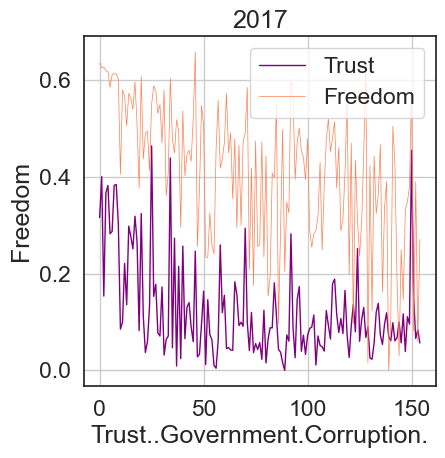

In [54]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
df17["Trust..Government.Corruption."].plot(kind='line', color='purple',label='Trust',linewidth=1,grid=True,linestyle="-")
df17["Freedom"].plot(kind="line", color="coral", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust..Government.Corruption.')
plt.ylabel('Freedom')
plt.title('2017')
plt.legend(loc='upper right')
plt.show()

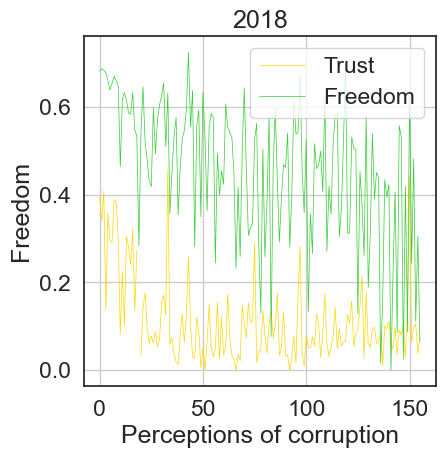

In [55]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 4)
df18["Perceptions of corruption"].plot(kind='line', color='gold',label='Trust',linewidth=0.5,grid=True,linestyle="-")
df18["Freedom to make life choices"].plot(kind="line", color="limegreen", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Perceptions of corruption')
plt.ylabel('Freedom')
plt.title('2018')
plt.legend(loc='upper right')
plt.show()